# Background Subtraction
Background subtraction is useful for moving object detection and tracking. There are multiple ways to create a background, with one of the simplest being the spatiotemporal median. The median is calculated for every pixel from the previous $N$ frames to the current frame $k$.

In [1]:
import numpy as np
from PIL import Image
import glob
import matplotlib.pyplot as plt

path = './pedestrians/'
ext = '*.jpg'

# Sorted list of images
files = glob.glob(path + ext)
files.sort()

In [2]:
def SpatiotemporalMedian(files: list, k: int = 0, N: int = 20) -> np.ndarray:
    # Get width and height from first image
    first  = np.asarray(Image.open(files[0]))
    height = first.shape[0]
    width  = first.shape[1]
    
    # Separate RGB channels
    red   = np.zeros((height, width, N))
    blue  = np.zeros((height, width, N))
    green = np.zeros((height, width, N))
    
    # Background model
    bg = np.zeros((height, width, 3))
    
    # Set RGB blocks
    for i in np.arange(k, k + N):
        image = np.asarray(Image.open(files[i]))
        
        red[:,:,i-k]   = image[:,:,0]
        blue[:,:,i-k]  = image[:,:,1]
        green[:,:,i-k] = image[:,:,2]
    
    # Sort and store middle values
    for r in np.arange(0, height):
        for c in np.arange(0, width):
            bg[r,c,0] = np.sort(red[r,c,:])[N // 2]
            bg[r,c,1] = np.sort(blue[r,c,:])[N // 2]
            bg[r,c,2] = np.sort(green[r,c,:])[N // 2]
            
    return bg.astype('uint8')

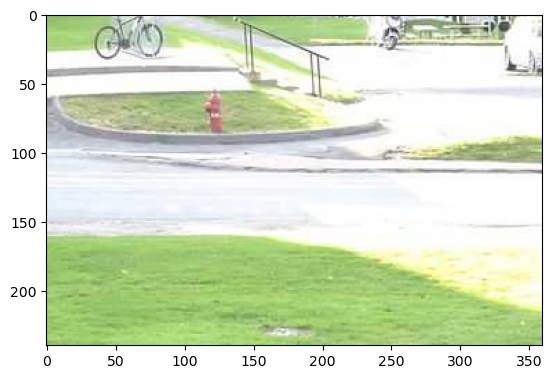

In [3]:
bg = SpatiotemporalMedian(files, 400, 100)
plt.imshow(bg)

In [4]:
def SpatiotemporalMean(files: list, k: int = 0, N: int = 20) -> np.ndarray:
    # Get width and height from first image
    first  = np.asarray(Image.open(files[0]))
    height = first.shape[0]
    width  = first.shape[1]
    
    # Separate RGB channels
    red   = np.zeros((height, width, N))
    blue  = np.zeros((height, width, N))
    green = np.zeros((height, width, N))
    
    # Background model
    bg = np.zeros((height, width, 3))

    # Set RGB blocks
    for i in np.arange(k, k + N):
        image = np.asarray(Image.open(files[i]))
        
        red[:,:,i-k]   = image[:,:,0]
        blue[:,:,i-k]  = image[:,:,1]
        green[:,:,i-k] = image[:,:,2]

    # Calculate and store mean
    for r in np.arange(0, height):
        for c in np.arange(0, width):
            bg[r,c,0] = np.average(red[r,c,:])
            bg[r,c,1] = np.average(blue[r,c,:])
            bg[r,c,2] = np.average(green[r,c,:])
            
    return bg.astype('uint8')

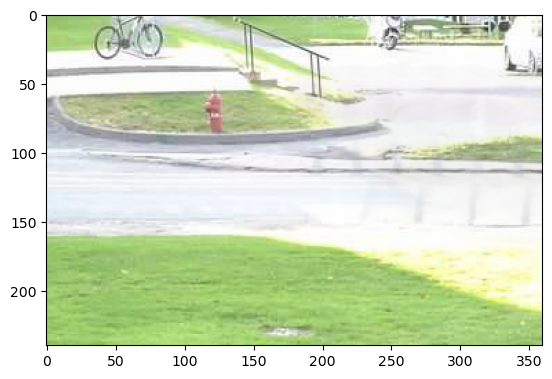

In [5]:
bg = SpatiotemporalMean(files, 400, 100)
plt.imshow(bg)